<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Python/210727_Project_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns


Dataset is annual charges and costs by Diagnostic Related Group (DRG) for U.S. hospitals. Last updated 6/1/21.  https://www.kaggle.com/dhirajnirne/hospital-charges-in-america

Average Covered Charges, Average Total Payments, Average Medicare Payments are still non-numeric even after taking off the dollar signs in the .csv file. 

Convert Average Covered Charges to number

Average Covered Charges, Average Total Payments, Average Medicare Payments are all NaN. Must reload file. 

Remove commas and pennies from the csv source file for Average Covered Charges, Average Total Payments, and Average Medicare Payments. Must add an underscore after DRG Code, Provider Id, and Provider Zip Code to prevent Python from classifying the column as numeric. 

Add an underscore after DRG Code, Provider Id, and Zip Code to allow Python to treat as string instead of number

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/v3 Hospital_Charges_In_America_Dhiraj_Kaggle.csv')
df2.head()

,DRG Code,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001_,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301_,AL - Dothan,91,32963,5777,4764
1,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005_,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957_,AL - Birmingham,14,15132,5788,4977
2,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006_,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631_,AL - Birmingham,24,37560,5435,4454
3,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011_,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235_,AL - Birmingham,25,13998,5418,4129
4,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016_,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007_,AL - Birmingham,18,31633,5658,4851


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Code                              163065 non-null  object
 1   DRG Definition                        163065 non-null  object
 2   Provider Id                           163065 non-null  object
 3   Provider Name                         163065 non-null  object
 4   Provider Street Address               163065 non-null  object
 5   Provider City                         163065 non-null  object
 6   Provider State                        163065 non-null  object
 7   Provider Zip Code                     163065 non-null  object
 8   Hospital Referral Region Description  163065 non-null  object
 9   Total Discharges                      163065 non-null  int64 
 10  Average Covered Charges               163065 non-null  int64 
 11  Average Total

In [ ]:
# Concatenate DRG Code and Provider Id 
df2['DRG Code-Provider Id'] = df2['DRG Code'] + df2['Provider Id']
df2.head()

,DRG Code,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Code-Provider Id
0,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001_,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301_,AL - Dothan,91,32963,5777,4764,039_10001_
1,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005_,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957_,AL - Birmingham,14,15132,5788,4977,039_10005_
2,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006_,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631_,AL - Birmingham,24,37560,5435,4454,039_10006_
3,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011_,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235_,AL - Birmingham,25,13998,5418,4129,039_10011_
4,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016_,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007_,AL - Birmingham,18,31633,5658,4851,039_10016_


In [ ]:
#Check if the combination of DRG Code and Provider Id is unique
df2['DRG Code-Provider Id'].is_unique

True

In [ ]:
# Multiply Average Covered Charges by Total Discharges to obtain new column, Total Charges
df2['Total Charges'] = df2['Average Covered Charges'] * df2['Total Discharges']

# Multiply Average Total Payments by Total Discharges to obtain new column, Total Payments
df2['Total Payments'] = df2['Average Total Payments'] * df2['Total Discharges']
df2.head()

,DRG Code,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,DRG Code-Provider Id,Total Charges,Total Payments
0,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001_,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301_,AL - Dothan,91,32963,5777,4764,039_10001_,2999633,525707
1,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005_,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957_,AL - Birmingham,14,15132,5788,4977,039_10005_,211848,81032
2,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006_,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631_,AL - Birmingham,24,37560,5435,4454,039_10006_,901440,130440
3,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011_,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235_,AL - Birmingham,25,13998,5418,4129,039_10011_,349950,135450
4,039_,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016_,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007_,AL - Birmingham,18,31633,5658,4851,039_10016_,569394,101844


In [ ]:
# Rank DRGs by Total Charges
df2.groupby(['DRG Definition'])['Total Charges'].sum().sort_values(ascending=False)

DRG Definition
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    21405316520
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    15768091251
291 - HEART FAILURE & SHOCK W MCC                                            7093525496
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC                      6711243630
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                                  6130083747
                                                                               ...     
536 - FRACTURES OF HIP & PELVIS W/O MCC                                       405417483
563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP, PELVIS & THIGH W/O MCC         394696321
684 - RENAL FAILURE W/O CC/MCC                                                331283835
301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC                                289306823
203 - BRONCHITIS & ASTHMA W/O CC/MCC                                          283993376
Name: Total Charg

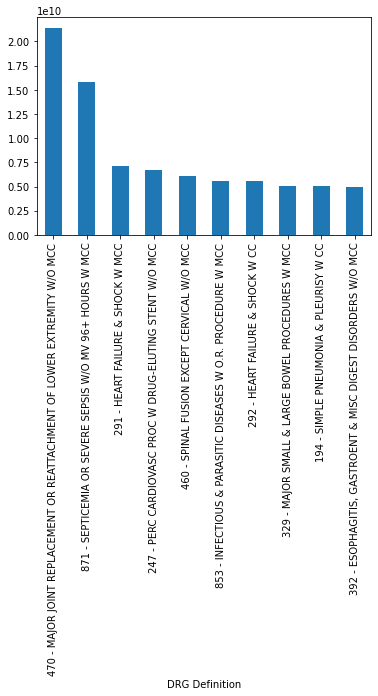

In [53]:
# Bar graph of top 10 DRGs ranked by Total Charges
df2.groupby(['DRG Definition'])['Total Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")

In [ ]:
# Rank DRGs by Total Charges at different hospitals 
df2.groupby(['DRG Definition', 'Provider Name'])['Total Charges'].sum().sort_values(ascending=False).head(20)


DRG Definition                                                            Provider Name                     
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  HOSPITAL FOR SPECIAL SURGERY          179684662
                                                                          GOOD SAMARITAN HOSPITAL               122597005
                                                                          PLAZA MEDICAL CENTER OF FORT WORTH     90855000
                                                                          WASHINGTON HOSPITAL                    90503416
                                                                          CEDARS-SINAI MEDICAL CENTER            81270774
                                                                          BAPTIST MEDICAL CENTER                 76717239
                                                                          FLORIDA HOSPITAL                       74273250
                                     

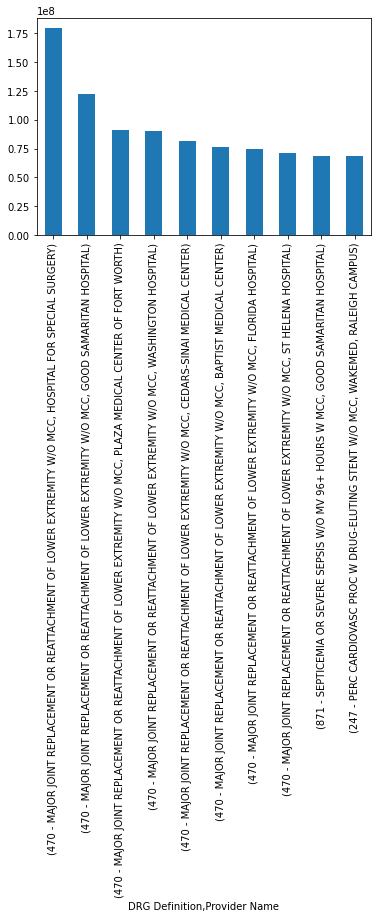

In [ ]:
# Bar graph for DRGs ranked by Total Charges at different hospitals 
df2.groupby(['DRG Definition', 'Provider Name'])['Total Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")

In [ ]:
# Rank DRGs by Total Charges at different hospitals - Hosptial first, DRG second
df2.groupby(['Provider Name', 'DRG Definition'])['Total Charges'].sum().sort_values(ascending=False).head(20)

Provider Name                       DRG Definition                                                          
HOSPITAL FOR SPECIAL SURGERY        470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    179684662
GOOD SAMARITAN HOSPITAL             470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    122597005
PLAZA MEDICAL CENTER OF FORT WORTH  470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC     90855000
WASHINGTON HOSPITAL                 470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC     90503416
CEDARS-SINAI MEDICAL CENTER         470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC     81270774
BAPTIST MEDICAL CENTER              470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC     76717239
FLORIDA HOSPITAL                    470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC     74273250
ST HELENA HOSPITAL                  4

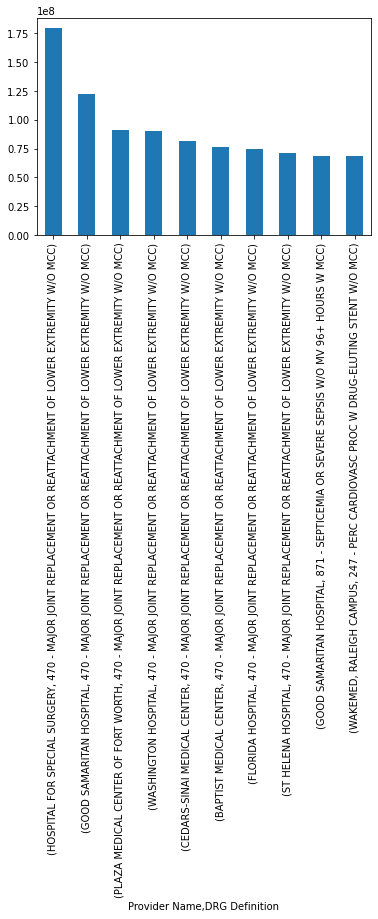

In [ ]:
# Bar chart for Rank DRGs by Total Charges at different hospitals - Hosptial first, DRG second
df2.groupby(['Provider Name', 'DRG Definition'])['Total Charges'].sum().sort_values(ascending=False).head(10).plot(kind="bar")

In [ ]:
# Rank DRGs by Total Charges at different hospitals - DRG first, State 2nd, Hosptial 3rd
df2.groupby(['DRG Definition', 'Provider State', 'Provider Name'])['Total Charges'].sum().sort_values(ascending=False).head(30)

DRG Definition                                                            Provider State  Provider Name                                 
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  NY              HOSPITAL FOR SPECIAL SURGERY                      179684662
                                                                          TX              PLAZA MEDICAL CENTER OF FORT WORTH                 90855000
                                                                          CA              WASHINGTON HOSPITAL                                90503416
                                                                                          CEDARS-SINAI MEDICAL CENTER                        81270774
                                                                          FL              FLORIDA HOSPITAL                                   74273250
                                                                          CA              ST HELENA HOSPITAL     

In [57]:
# Rank hospitals by Total Charges at for the top DRG - 470 - Major Joint Replacement
df3 = df2[df2['DRG Code'] == "470_"]
df3.groupby(['DRG Definition', 'Provider Name'])['Total Charges'].sum().sort_values(ascending=False).head(30)

DRG Definition                                                            Provider Name                                 
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  HOSPITAL FOR SPECIAL SURGERY                      179684662
                                                                          GOOD SAMARITAN HOSPITAL                           122597005
                                                                          PLAZA MEDICAL CENTER OF FORT WORTH                 90855000
                                                                          WASHINGTON HOSPITAL                                90503416
                                                                          CEDARS-SINAI MEDICAL CENTER                        81270774
                                                                          BAPTIST MEDICAL CENTER                             76717239
                                                                          F

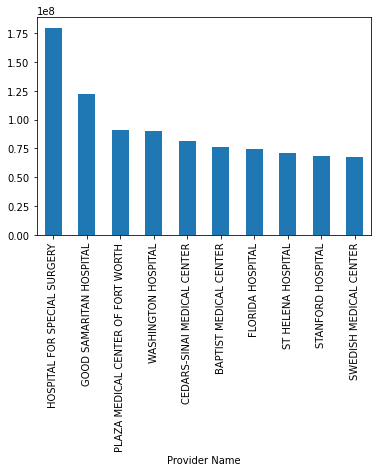

In [59]:
# Bar chart for Top 10 Hospitals ranked by Total Charges at for the top DRG - 470 - Major Joint Replacement
df3 = df2[df2['DRG Code'] == "470_"]
df3.groupby(['Provider Name'])['Total Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")